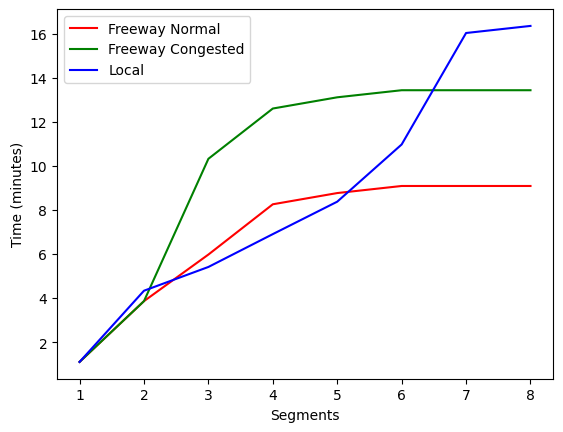

[1.1022727272727273, 4.33474025974026, 5.413252656434475, 6.904161747343565, 8.376564344746162, 10.973642266824085, 16.03370720188902, 16.355070838252654]
[1.1022727272727273, 3.862012987012987, 5.97668240850059, 8.258500590318771, 8.767835005903187, 9.089198642266824, 9.089198642266824, 9.089198642266824]
[1.1022727272727273, 3.862012987012987, 10.323502886002887, 12.605321067821068, 13.114655483405484, 13.43601911976912, 13.43601911976912, 13.43601911976912]
Local 16.03370720188902
Freeway Normal 9.089198642266824
Freeway Congested 13.43601911976912


In [87]:
import math
import matplotlib.pyplot as plt
# ================================================================
# simple model of traffic - time to work
# Compares time to work for two routes and two sets of traffic conditions
#
# Model Parameter Definitions Description
# Local street average speed 25 mph
# Major street average speed 40 mph
# Normal freeway avg. speed 55 mph
# Congested freeway avg. speed 20 mph
# Stop sign average stop time 30 second delay
# Traffic light delay average 2 minutes
# Left turn onto major road delay 2.5 minutes
#
# ================================================================

# Set parameters for different traffic conditions
# Model parameters
local_speed = 25 # average speed for local streets (mph]
major_speed = 35 # average speed for a major street (mph)
normal_freeway = 55 # average freeway speed in normal conditions (mph)
congest_freeway = 18 # average freeway speed during congestion (mph)
Avg_redlight = 2.0 # average time for traffic light minutes
left_on_major = 2.5 # time delay to make left onto major street minutes
stop_sign = 30 # average time for a stop sign in seconds
# Creat a matrix to read in the length data for each segment
segment = [1325., 716., 2800., 3052., 2995., 1839., 1725., 707., 2340., 10235., 868.]
# Enter the segment data into the matrix - add the other segments

# convert segment units from feet into miles
# to use the average speed in the calculations
# Insert a statement in the loop below to convert for all 11 segments
for i in range(11):
    segment[i] = segment[i] / 5280

# Set up routes
# Store each leg of the route in a matrix
freeway_normal = [0.]*8
free_norm_cum = [0.]*8
freeway_congest = [0.]*8
free_con_cum = [0.]*8
local = [0.]*8
local_cum = [0.]*8
#create an index for plotting the final cumulative totals and assign values
ind = [1,2,3,4,5,6,7,8]
# fill in freeway normal
#For each freeway normal segment freeway_normal[1]. freeway_normal[2],
#freenormal[3] ... insert a formula that represents the time in minutes
#to traverse the segment plus any additional time for a traffic control
#device. You should have six segments to get from home to work

freeway_normal[0] = segment[0] / local_speed * 60 + (stop_sign / 60)
freeway_normal[1] = segment[8] / major_speed * 60 + Avg_redlight
freeway_normal[2] = segment[9] / normal_freeway * 60
freeway_normal[3] = segment[10] / major_speed * 60 + Avg_redlight
freeway_normal[4] = segment[6] / major_speed + (stop_sign / 60)
freeway_normal[5] = segment[7] / local_speed * 60

freeway_congest[0] = segment[0] / local_speed * 60 + (stop_sign / 60)
freeway_congest[1] = segment[8] / major_speed * 60 + Avg_redlight
freeway_congest[2] = segment[9] / congest_freeway * 60
freeway_congest[3] = segment[10] / major_speed * 60 + Avg_redlight
freeway_congest[4] = segment[6] / major_speed + (stop_sign / 60)
freeway_congest[5] = segment[7] / local_speed * 60

local[0] = segment[0] / local_speed * 60 + (stop_sign / 60)
local[1] = segment[1] / major_speed * 60 + left_on_major + (stop_sign / 60)
local[2] = segment[2] / normal_freeway * 60 + (stop_sign / 60)
local[3] = segment[3] / major_speed * 60 + (stop_sign / 60)
local[4] = segment[4] / major_speed * 60 + (stop_sign / 60)
local[5] = segment[5] / major_speed * 60 + Avg_redlight
local[6] = segment[6] / major_speed * 60 + Avg_redlight + left_on_major
local[7] = segment[7] / local_speed * 60

#Calculate the cumulative totals
# Start with the time to traverse the first segment of each route
local_cum[0]= local[0]
free_norm_cum[0]=freeway_normal[0]
free_con_cum[0]=freeway_congest[0]
#Now insert statements in the loop below that add subsequent times for
#each segment and store the result in the appropriate value of the
#cumulative total. You want to end up with a vector with eight values
#that represent the cumulative total time for each route.

for y in range(1, 8):
    local_cum[y] = local_cum[y-1] + local[y]
for y in range(1, 8):
    free_norm_cum[y] = free_norm_cum[y-1] + freeway_normal[y]
    free_con_cum[y] = free_con_cum[y-1] + freeway_congest[y]
#**This section graphs a line for each condition for all of the values
#**calculated for our model.
#**plotting each value of our matrix against the value of red_prob
#**(represented as y) and assigning a different color to each. A legend is
#**also created.
plt.plot(ind,free_norm_cum, color = 'r', label = "Freeway Normal")
plt.plot(ind,free_con_cum, color = 'g', label = "Freeway Congested")
plt.plot(ind,local_cum, color = 'b', label = "Local")
plt.xlabel('Segments')
plt.ylabel('Time (minutes)')

plt.legend(loc=2)

plt.show()
print(local_cum)
print(free_norm_cum)
print(free_con_cum)
#calculate the totals for each route
#Create a final sum of time for each route. This should be
#equal to the final cumulative total calculated above and can be
#be used as a check on your code.

local_tot= sum(local[0:7])
free_norm_tot = sum(freeway_normal[0:7])
free_cong_tot = sum(freeway_congest[0:7])
print('Local', local_tot)
print('Freeway Normal', free_norm_tot)
print('Freeway Congested', free_cong_tot)

1. Is the traffic model a linear model? How do you know this? Under what circumstances would the
flow of traffic be non-linear? (10 pts)
2. Please show the screenshot of the output of your program and upload the program code in
Python. (the three scenarios) (30 pts)
3. Describe the outcomes of the modeling effort. How long will each route take? Would you always
choose the same route? (10 pts)
4. If this were a model of routes in your local community, describe what data you would collect for
three of the parameters to improve or validate the model. (10 pts)

--
1. It is a linear model because it shows a positive correlation between the two variables and that it slopes upwards, has a upward trend.
2.
3. Local appears to take the most time because it has the most number of segments at 16 minutes. Freeway normal, at 9 minutes, is the fastest because it takes the least amount of time to travel. Freeway congested, at 13 minutes takes slightly longer than its normal counterpart.
4. The data most likely to be collected is the time it takes to navigate a route